In [1]:
from sklearn.manifold import TSNE
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline

In [26]:
#dataframe final
df_final = pd.read_csv("../data/DF_contact400_energy_2019.f_corr.csv",index_col=0)


index_ddg8 = (df_final['ddG_exp']==8)
df_final = df_final.loc[-index_ddg8]
#testiar eliminando estructuras con ddg menor o igual a -4 kcal/mol , outliers
index_ddg_4 =  (df_final['ddG_exp'] <= -4)
df_final = df_final.loc[-index_ddg_4]


pdb_names = df_final.index
features_names = df_final.drop('ddG_exp',axis=1).columns

In [28]:
#X = df_final_f1 # con filtrado de varianza
X = df_final.drop('ddG_exp',axis=1).astype(float)
y = df_final['ddG_exp']

In [29]:
tsne = TSNE(n_components=2,learning_rate=100,perplexity=25,
            random_state=1313,verbose=2)
X_tsne = tsne.fit_transform(X)

[t-SNE] Computing 76 nearest neighbors...
[t-SNE] Indexed 615 samples in 0.005s...
[t-SNE] Computed neighbors for 615 samples in 0.139s...
[t-SNE] Computed conditional probabilities for sample 615 / 615
[t-SNE] Mean sigma: 7.272719
[t-SNE] Computed conditional probabilities in 0.029s
[t-SNE] Iteration 50: error = 52.8937531, gradient norm = 0.2932175 (50 iterations in 0.201s)
[t-SNE] Iteration 100: error = 45.4519157, gradient norm = 0.2183088 (50 iterations in 0.109s)
[t-SNE] Iteration 150: error = 43.4791908, gradient norm = 0.1709305 (50 iterations in 0.111s)
[t-SNE] Iteration 200: error = 42.5085945, gradient norm = 0.1638005 (50 iterations in 0.112s)
[t-SNE] Iteration 250: error = 41.9014130, gradient norm = 0.1547932 (50 iterations in 0.124s)
[t-SNE] KL divergence after 250 iterations with early exaggeration: 41.901413
[t-SNE] Iteration 300: error = 0.2428611, gradient norm = 0.0009307 (50 iterations in 0.119s)
[t-SNE] Iteration 350: error = 0.1711621, gradient norm = 0.0003815 (

In [30]:
tsne_target3D = np.concatenate((X_tsne,y.values.reshape((615,1))),axis=1)

In [81]:
tsne_target3D[:,[0, 2]] = tsne_target3D[:,[2, 0]]


<IPython.core.display.Javascript object>


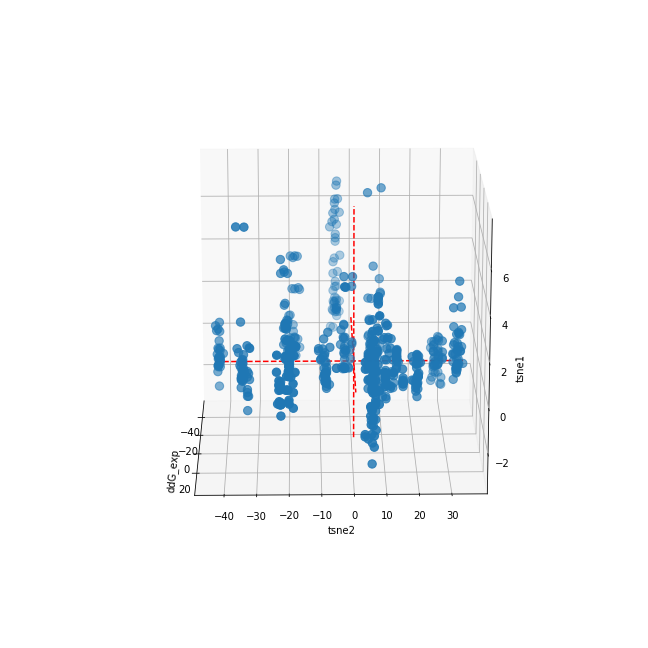

Text(0.5, 0, 'tsne1')

In [31]:
%matplotlib notebook
data = tsne_target3D

# Plot initialisation
fig = plt.figure(figsize=(9,9))
ax = fig.add_subplot(1,1,1,projection='3d')

ax.scatter(data.T[0], data.T[1], data.T[2], cmap="Set1", s=70)


# make simple, bare axis lines through space:
xAxisLine = ((min(data.T[0]), max(data.T[0])), (0.5, 0.5), (0.5,0.5))
ax.plot(xAxisLine[0], xAxisLine[1], xAxisLine[2], 'r',linestyle='--')
yAxisLine = ((0.5, 0.5), (min(data.T[1]), max(data.T[1])), (0.5,0.5))
ax.plot(yAxisLine[0], yAxisLine[1], yAxisLine[2], 'r',linestyle='--')
zAxisLine = ((0.5, 0.5), (0.5,0.5), (min(data.T[2]), max(data.T[2])))
ax.plot(zAxisLine[0], zAxisLine[1], zAxisLine[2], 'r',linestyle='--')

ax.set_xlabel("ddG_exp")
ax.set_ylabel("tsne2")
ax.set_zlabel("tsne1")
#plt.legend(color_labels)

In [41]:
from scipy.interpolate import griddata

x2,y2 = np.meshgrid(data.T[0],data.T[1])
z2 = griddata((data.T[0], data.T[1]), data.T[2], (x2, y2), method='linear')


In [34]:
griddata?

<IPython.core.display.Javascript object>


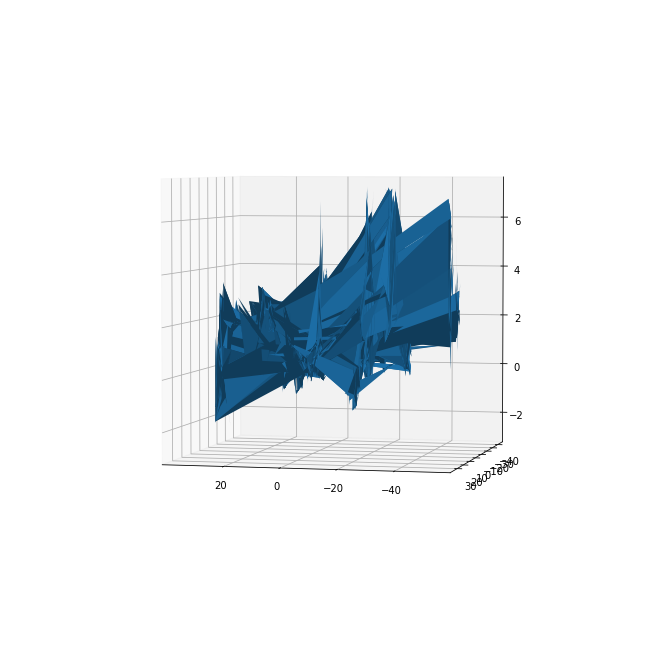

In [42]:
%matplotlib notebook
data = tsne_target3D

# Plot initialisation
fig = plt.figure(figsize=(9,9))
ax = fig.add_subplot(1,1,1,projection='3d')

ax.plot_surface(x2, y2, z2,linewidth=0)
